In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [5]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-10-28 15:51:06--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-28 15:51:06 (44.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

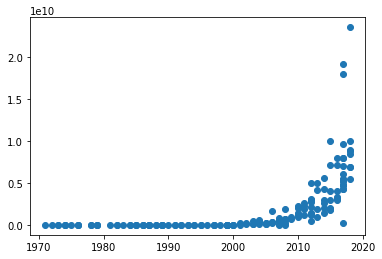

In [7]:
plt.scatter(X,Y)

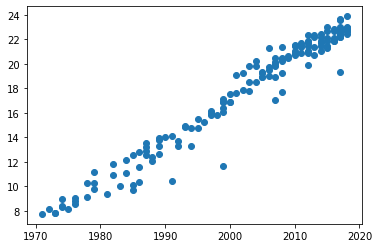

In [8]:
Y = np.log(Y)
plt.scatter(X,Y)
X = X - X.mean()

In [9]:
model = Sequential([
        Input(shape=(1,)),
        Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 334.2402
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 318.6596
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 328.4663
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 208.4660
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 167.9126
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 123.1584
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 99.3306
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 65.1642
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 44.0996
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 34.4638
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 33.9364
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 22.1892
Epoch 13/200
6/6 [=========================

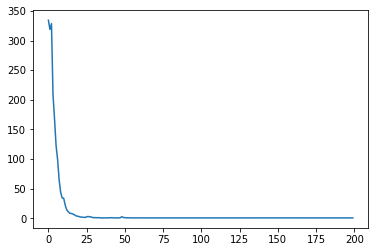

In [10]:
plt.plot(r.history['loss'], label='loss')

In [11]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34230915]], dtype=float32), array([17.763699], dtype=float32)]


In [12]:
a = model.layers[0].get_weights()[0][0,0]

In [24]:
X = np.array(X).flatten()
Y = np.array(Y)

denominator = np.prod(X.dot(X) - X.mean(), X.sum())
a = ( X.dot(Y) - Y.mean()* X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a,b)
print("Time to double:", np.log(2)/a)

TypeError: ignored

In [25]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

ValueError: ignored